Import required liberies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import MaxPooling2D,Conv2D,ReLU
from tensorflow.keras.models import Sequential


Import dataset and create tensorflow dataset pipeline

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='PlantVillage',
    batch_size=32,
    image_size=(256,256),
    shuffle=True


    
)

Found 2153 files belonging to 3 classes.


In [3]:
class_names=dataset.class_names

In [4]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

Data Vizualization

In [5]:
for image_batch,image_label in dataset.take(2):
    print(image_batch[2].numpy())

[[[142. 140. 153.]
  [102. 100. 113.]
  [104. 102. 115.]
  ...
  [128. 130. 143.]
  [125. 127. 140.]
  [123. 125. 138.]]

 [[114. 112. 125.]
  [139. 137. 150.]
  [ 90.  88. 101.]
  ...
  [142. 144. 157.]
  [142. 144. 157.]
  [142. 144. 157.]]

 [[109. 107. 120.]
  [129. 127. 140.]
  [117. 115. 128.]
  ...
  [140. 142. 155.]
  [141. 143. 156.]
  [141. 143. 156.]]

 ...

 [[133. 131. 144.]
  [140. 138. 151.]
  [135. 133. 146.]
  ...
  [171. 173. 185.]
  [166. 168. 180.]
  [163. 165. 177.]]

 [[131. 129. 142.]
  [148. 146. 159.]
  [143. 141. 154.]
  ...
  [185. 187. 199.]
  [160. 162. 174.]
  [162. 164. 176.]]

 [[118. 116. 129.]
  [143. 141. 154.]
  [141. 139. 152.]
  ...
  [228. 230. 242.]
  [169. 171. 183.]
  [159. 161. 173.]]]
[[[168. 176. 199.]
  [172. 180. 203.]
  [175. 183. 206.]
  ...
  [119. 125. 149.]
  [114. 120. 144.]
  [108. 114. 138.]]

 [[173. 181. 204.]
  [173. 181. 204.]
  [173. 181. 204.]
  ...
  [120. 126. 150.]
  [119. 125. 149.]
  [118. 124. 148.]]

 [[178. 186. 209.]

2025-09-05 15:17:25.550449: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


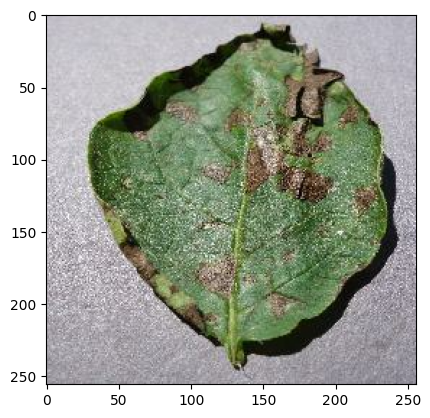

2025-09-05 15:17:25.712039: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
for image_batch,image_label in dataset.take(1):
    plt.imshow(image_batch[1].numpy().astype('uint8'))
    plt.show()
                   

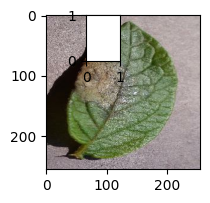

2025-09-05 15:17:25.822334: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


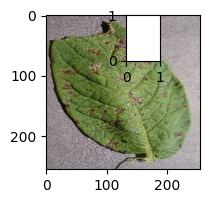

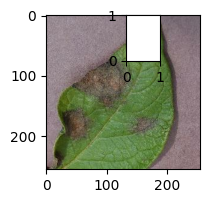

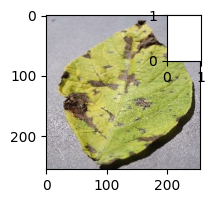

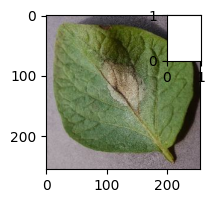

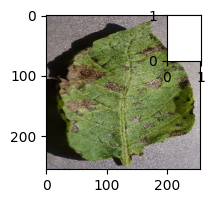

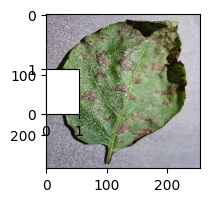

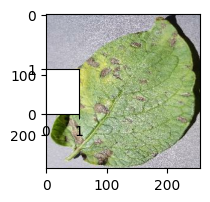

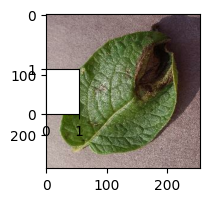

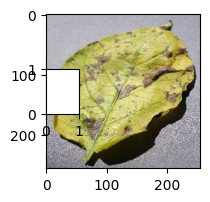

In [7]:
for i in range(5):
    for image_batch,image_label in dataset.take(i):
        plt.figure(figsize=(2,2))
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.subplot(3,4,i+1)
        plt.show()

Train_test_splilt

In [8]:
len(dataset)

68

In [9]:
#Train=====> 80%
#Test======>10%
#val_data===>10%

In [10]:
trian_ds=dataset.take(50)
data=dataset.skip(50)
test_ds=data.take(9)
val_ds=data.skip(9)

In [11]:
print(68*80/100,68*10/100)

54.4 6.8


In [12]:
#train_ds,test_ds,val_ds

In [13]:
#model data augmentation,resize and resaling

In [14]:
rescaling = tf.keras.layers.Rescaling(1.00/255)
resizing= tf.keras.layers.Resizing(256,256)
rescaling_resizing = tf.keras.models.Sequential([
    rescaling,
    resizing
        


    
])
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2)



    
])







In [15]:
#creating an CNN model
model=tf.keras.models.Sequential([
    rescaling_resizing,
    data_augmentation,
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
    
    
    
    
])



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [18]:
history=model.fit(trian_ds,validation_data=val_ds,epochs=10,batch_size=10)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 614ms/step - accuracy: 0.5863 - loss: 0.8459 - val_accuracy: 0.7283 - val_loss: 0.6240
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 668ms/step - accuracy: 0.8494 - loss: 0.4293 - val_accuracy: 0.8075 - val_loss: 0.4535
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 733ms/step - accuracy: 0.8950 - loss: 0.2628 - val_accuracy: 0.7094 - val_loss: 0.6851
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 736ms/step - accuracy: 0.9237 - loss: 0.1997 - val_accuracy: 0.8642 - val_loss: 0.3183
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 840ms/step - accuracy: 0.9369 - loss: 0.1607 - val_accuracy: 0.9283 - val_loss: 0.1655
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 769ms/step - accuracy: 0.9306 - loss: 0.1711 - val_accuracy: 0.8491 - val_loss: 0.3544
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 763ms/step - accuracy: 0.9456 - loss: 0.1386 - val_accuracy: 0.8755 - val_loss: 0.2812
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 755ms/step - accuracy: 0.9413 - loss: 0.1628 - val_accu

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,688,971 (10.26 MB)

 Trainable params: 896,323 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,792,648 (6.84 MB)

In [23]:
score=model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.9271 - loss: 0.1784


In [24]:
print(score)

[0.17844904959201813, 0.9270833134651184]


In [26]:

history

In [30]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 50}

In [35]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']


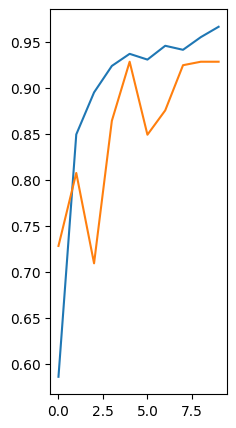

In [50]:
#plotting
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(accuracy)
plt.plot(val_accuracy)

plt.show()

First image to predict
actual_label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
prediction_label
None Potato___Early_blight


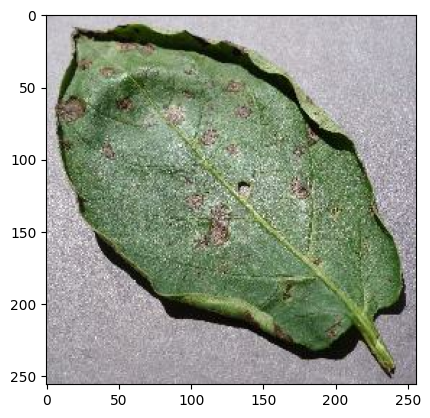

In [66]:
#prediction
for image_batch,image_label in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_image_label=image_label[0].numpy()
print('First image to predict')
print('actual_label:',class_names[first_image_label])
plt.imshow(first_image)
batch_prediction=model.predict(image_batch)
print(print('prediction_label'),class_names[np.argmax(batch_prediction[0])])

In [69]:
import pickle
pickle.dump(model,open('potato_disease.pkl','wb'))